#

# Credit Risk Scoring

In [215]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [216]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [217]:
#!wget $data

In [218]:
df = pd.read_csv("../data/CreditScoring.csv")

In [219]:
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [220]:
df.columns = df.columns.str.lower()

In [221]:
status_values = {
    1: 'ok', 
    2: 'default', 
    0: 'unknown'
}
df.status = df.status.map(status_values)

In [222]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,ok,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,default,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,ok,0,1,48,23,1,1,3,49,140,0,0,550,550


In [223]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [224]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [225]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [226]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [227]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [228]:
df.status.value_counts()

status
ok         3200
default    1254
unknown       1
Name: count, dtype: int64

In [229]:
df = df[df.status != 'unknown'].reset_index(drop=True)

In [230]:
df.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
df.index

RangeIndex(start=0, stop=4454, step=1)

In [233]:
#idx = np.random.shuffle(df.index)
df_full_train, df_test = train_test_split(df, test_size=0.2,random_state=11, shuffle=True)
df_train, df_val = train_test_split(df_full_train, test_size=0.25,random_state=11, shuffle=True)

In [234]:
df_train =df_train.reset_index(drop=True)
df_val =df_val.reset_index(drop=True)
df_test =df_test.reset_index(drop=True)

In [235]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [236]:
del df_train['status']
del df_val['status']
del df_test['status']

In [237]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


In [238]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [239]:
xi = df_train.iloc[0].to_dict()

In [240]:
assess_risk(xi)

'ok'

In [241]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [242]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False) # requires dict
X_train = dv.fit_transform(train_dicts)

In [243]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [244]:
dt = DecisionTreeClassifier()

In [245]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [246]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [247]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.6553274321280667

In [248]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)

1.0

the model is overfitting...  
Possible solutions:
add regularization paramter.  
use a lower tree depth.
reduce the number of features
use an ensamble method  / cross validation.

In [249]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [250]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train,y_pred)
print('train', auc)#

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
print('val', auc)#

train 0.7761016984958594
val 0.7389079944782155


decision stump, tree with depth 1 is just a bit worse than the overfitting one.

In [251]:
from sklearn.tree import export_text

In [252]:
tree_rules = export_text(dt, feature_names = dv.get_feature_names_out())
print(tree_rules)

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



### find the best split

In [253]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]
df_example = pd.DataFrame(data,columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [254]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [255]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [256]:
from IPython.display import display

In [257]:
for T in Ts:

    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    display(df_left.status.value_counts(normalize=True))
    i_left= df_left.status.value_counts(normalize=True)[-1]
    display(df_right)
    display(df_right.status.value_counts(normalize=True))
    i_right = df_right.status.value_counts(normalize=True)[-1]
    print('avg', i_left+i_right/2)
    print(T)


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64

C:\Users\hohih\AppData\Local\Temp\ipykernel_25804\696607718.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i_left= df_left.status.value_counts(normalize=True)[-1]


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

avg 1.2142857142857142
0


C:\Users\hohih\AppData\Local\Temp\ipykernel_25804\696607718.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i_right = df_right.status.value_counts(normalize=True)[-1]


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64

C:\Users\hohih\AppData\Local\Temp\ipykernel_25804\696607718.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i_left= df_left.status.value_counts(normalize=True)[-1]


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

avg 1.1666666666666667
2000


C:\Users\hohih\AppData\Local\Temp\ipykernel_25804\696607718.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i_right = df_right.status.value_counts(normalize=True)[-1]


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64

C:\Users\hohih\AppData\Local\Temp\ipykernel_25804\696607718.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i_left= df_left.status.value_counts(normalize=True)[-1]


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

avg 1.1
3000


C:\Users\hohih\AppData\Local\Temp\ipykernel_25804\696607718.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i_right = df_right.status.value_counts(normalize=True)[-1]


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64

C:\Users\hohih\AppData\Local\Temp\ipykernel_25804\696607718.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i_left= df_left.status.value_counts(normalize=True)[-1]


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

avg 0.375
4000


C:\Users\hohih\AppData\Local\Temp\ipykernel_25804\696607718.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i_right = df_right.status.value_counts(normalize=True)[-1]


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

C:\Users\hohih\AppData\Local\Temp\ipykernel_25804\696607718.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i_left= df_left.status.value_counts(normalize=True)[-1]


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

avg 0.75
5000


C:\Users\hohih\AppData\Local\Temp\ipykernel_25804\696607718.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i_right = df_right.status.value_counts(normalize=True)[-1]


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

C:\Users\hohih\AppData\Local\Temp\ipykernel_25804\696607718.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i_left= df_left.status.value_counts(normalize=True)[-1]


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64

avg 0.9285714285714286
8000


C:\Users\hohih\AppData\Local\Temp\ipykernel_25804\696607718.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i_right = df_right.status.value_counts(normalize=True)[-1]


Split evaluation criteria:
pick a threshold and calculate a misclassification rate (impurity)
left 0.25, right 0.75
default    ok

25% average

For all features and thresholds find the best split with lowest impurity  
Apply it recursevily  
apply it indefinetly untill:  
- group is aleready pure 
- tree reached depth limit
- if group is smaller than a minimum size we stop. (group too smal to split)  

this prevents opverfitting
find the best split, check if max depth is reached, check if dataset is sufficiently large and not pure yet, repeat it on the left, recursevily same algorithm. 
do same for the right
To measure the impurity you can use the entropy and gini 


decision trees can besolved for regression problems, impurity criteria is the mean squared error  
'




### Parameter tuning for decision trees

In [258]:
for d in [1,2,3,4,5,6,10,15,20,None]:
    dt = DecisionTreeClassifier(max_depth = d) #, min_samples_leaf = )
    dt.fit(X_train,y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' %(d,auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.745
  10 -> 0.701
  15 -> 0.657
  20 -> 0.663
None -> 0.658


the easier the model the better for same accuracy, easier to explain  
best depth is 4-6  
try min_sample_leaf

In [259]:
scores = []
for d in [4,5,6, 7, 10, 20, None]:
    for s in [1,2,5,10,15,20,100,200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train,y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        print('(%4s, %3s) -> %.3f' % (d,s, auc))#
        scores.append((d,s,auc))

(   4,   1) -> 0.761
(   4,   2) -> 0.761
(   4,   5) -> 0.761
(   4,  10) -> 0.761
(   4,  15) -> 0.764
(   4,  20) -> 0.761
(   4, 100) -> 0.756
(   4, 200) -> 0.747
(   4, 500) -> 0.680
(   5,   1) -> 0.766
(   5,   2) -> 0.767
(   5,   5) -> 0.768
(   5,  10) -> 0.762
(   5,  15) -> 0.772
(   5,  20) -> 0.774
(   5, 100) -> 0.763
(   5, 200) -> 0.759
(   5, 500) -> 0.680
(   6,   1) -> 0.756
(   6,   2) -> 0.750
(   6,   5) -> 0.762
(   6,  10) -> 0.778
(   6,  15) -> 0.785
(   6,  20) -> 0.774
(   6, 100) -> 0.776
(   6, 200) -> 0.768
(   6, 500) -> 0.680
(   7,   1) -> 0.734
(   7,   2) -> 0.753
(   7,   5) -> 0.756
(   7,  10) -> 0.763
(   7,  15) -> 0.780
(   7,  20) -> 0.779
(   7, 100) -> 0.780
(   7, 200) -> 0.768
(   7, 500) -> 0.680
(  10,   1) -> 0.676
(  10,   2) -> 0.731
(  10,   5) -> 0.726
(  10,  10) -> 0.767
(  10,  15) -> 0.790
(  10,  20) -> 0.784
(  10, 100) -> 0.779
(  10, 200) -> 0.768
(  10, 500) -> 0.680
(  20,   1) -> 0.658
(  20,   2) -> 0.688
(  20,   5) -

In [260]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_sample_leaf', 'auc'])
df_scores.head()

,max_depth,min_sample_leaf,auc
0,4.0,1,0.761283
1,4.0,2,0.761283
2,4.0,5,0.761283
3,4.0,10,0.761283
4,4.0,15,0.763726


In [261]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_sample_leaf,auc
40,10.0,15,0.789552
49,20.0,15,0.787826
58,NaN,15,0.786651
22,6.0,15,0.785319
59,NaN,20,0.785120


In [262]:
df_scores_pivot = df_scores.pivot(index='min_sample_leaf', columns='max_depth', values='auc')
df_scores_pivot.round(3)

max_depth,NaN,4.0,5.0,6.0,7.0,10.0,20.0
min_sample_leaf,,,,,,,
1,0.667,0.761,0.766,0.756,0.734,0.676,0.658
2,0.690,0.761,0.767,0.750,0.753,0.731,0.688
5,0.710,0.761,0.768,0.762,0.756,0.726,0.713
10,0.758,0.761,0.762,0.778,0.763,0.767,0.761
15,0.787,0.764,0.772,0.785,0.780,0.790,0.788
20,0.785,0.761,0.774,0.774,0.779,0.784,0.783
100,0.779,0.756,0.763,0.776,0.780,0.779,0.779
200,0.768,0.747,0.759,0.768,0.768,0.768,0.768
500,0.680,0.680,0.680,0.680,0.680,0.680,0.680


<Axes: xlabel='max_depth', ylabel='min_sample_leaf'>

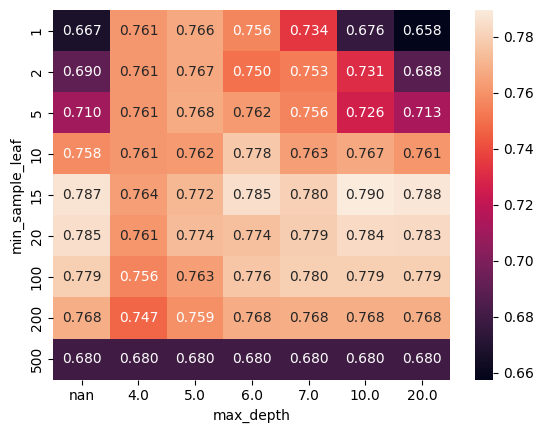

In [263]:
sns.heatmap(df_scores_pivot, annot= True, fmt='.3f')

we first tired to find the best max depth and then best leaf.  
but we can't try every possible combination for big datasets.  
restrict search space first with depth and then leaf

In [264]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)

### Random Forest
combine multiple decision trees together  
majority vote of N experts  
score fo model i $p_i$, decision D
$$ 
D = \frac{1}{N} \sum_i p_i
$$

Change the set of features for each tree. If there are M available features, we can use different combinations of features.

In [265]:
from sklearn.ensemble import RandomForestClassifier

In [266]:
rf = RandomForestClassifier(n_estimators = 10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [267]:
y_pred = rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
auc

0.7744726453706618

In [268]:
scores = []
for n in range(10,201, 10):
    rf = RandomForestClassifier(n_estimators = n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n,auc))

In [269]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

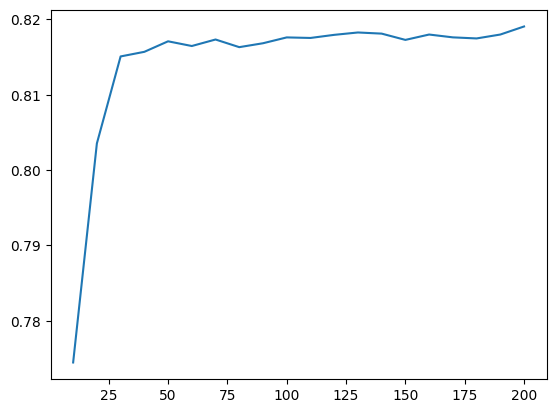

In [270]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [191]:
scores = []
for d in [5, 10, 15]:

    for n in range(10,201, 10):
        rf = RandomForestClassifier(n_estimators = n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [193]:
columns=['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


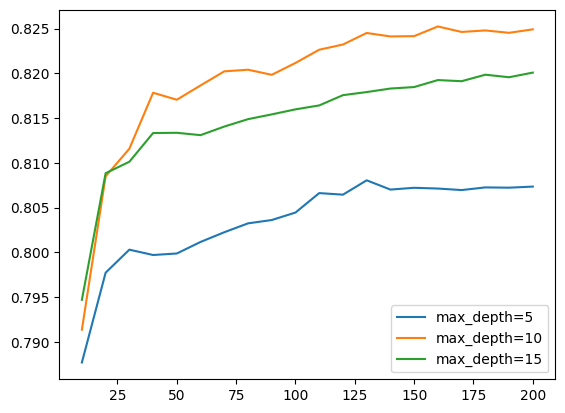

In [195]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth==d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' %d)

plt.legend()

In [271]:
max_depth = 10

In [198]:
scores = []
for s in [1,3,5,10,50]:

    for n in range(10,201, 10):
        rf = RandomForestClassifier(n_estimators = n, 
                                    max_depth=max_depth, 
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [199]:
columns=['min_sample_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_sample_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


In [272]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_sample_leaf_values = [1,3,5,10,50]

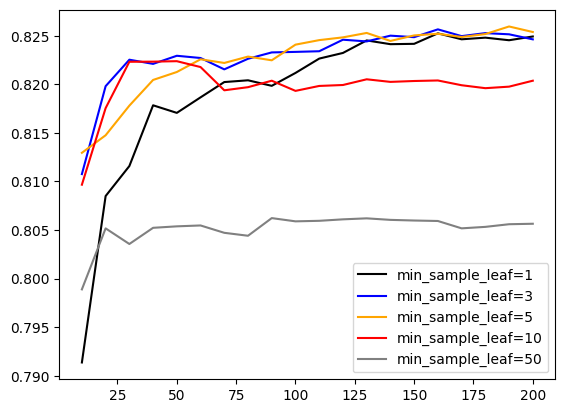

In [208]:

for s, col in zip(min_sample_leaf_values,colors):
    df_subset = df_scores[df_scores.min_sample_leaf==s]
    plt.plot(df_subset.n_estimators, df_subset.auc, color= col, label='min_sample_leaf=%d' %s)

plt.legend()

In [273]:
min_sample_leaf = 3
n = 100

In [274]:
rf = RandomForestClassifier(
    n_estimators = n,
    max_depth = max_depth,
    min_samples_leaf = min_sample_leaf,
    random_state = 1
)


- max depth and min samples leaf are the most useful paramters  
- max_features specifies how many feature each rand tree will use  
- bootstrap would randomize the data used (raw level)
- n_jobs how many models we can train in parallel
n_jobs =-1 will use all available processors

### Combining decision trees using gradient boosting
correct the error of the next model  
Boosting model is trained, errors are looked at, train a new model based on it, check the error, train a third model, .. for many iterations  
final prediction is the combination of the predictions of each model  

gradient boosting with trees is XG boost

In [275]:
#!pip install xgboost

In [279]:
import xgboost as xgb

wrap data in a DMatrix data structure to optimize training speed


In [306]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names = features)

In [309]:
dval = xgb.DMatrix(X_val, label=y_val, feature_names = features)

In [310]:
watchlist = [(dtrain, 'train'),(dval, 'val')]

In [331]:
%%capture output
xgb_params = {
    'eta': 0.3, # learning rate
    'max_depth': 6,
    'min_child_weight': 1, # same as min_samples_leaf
    'objective': 'binary:logistic', # binary classification
    'nthreads': 8, #parallelization of training

    'eval_metric': 'auc',
    'seed': 1, 
    'verbosity':1, # show only warnings
}
model = xgb.train(xgb_params, 
                  dtrain, 
                  verbose_eval=5,
                  evals=watchlist,
                  num_boost_round = 200
                  ) # prone to overfitting if num_boost_round is high



In [320]:
s = output.stdout
line = s.split('\n')[0]

In [321]:
num_iter, train_auc, val_auc = line.split('\t')

In [322]:
int(num_iter.strip('[]'))

0

In [323]:
float(train_auc.split(':')[1])
float(val_auc.split(':')[1])

0.77938

In [324]:
def parse_xgb_output(output):
    results = []
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it,train,val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results



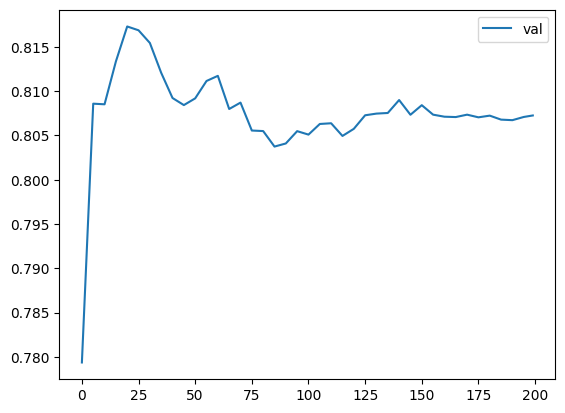

In [326]:
df_score = parse_xgb_output(output)
#plt.plot(df_score.num_iter,df_score.train_auc, label = 'train')
plt.plot(df_score.num_iter,df_score.val_auc, label = 'val')
plt.legend()

In [327]:
y_pred = model.predict(dval)
roc_auc_score(y_val,y_pred)

0.8072491584122448

evaluate a model right afte rtraining it  
for that create a watchlist.

### XGBoost paramater tuning
eta = learning rate, with how much weight the prediction of the previous model is used for the next model  

In [328]:
scores = {}

In [350]:
%%capture output
xgb_params = {
    'eta': 0.01, # learning rate
    'max_depth': 6,
    'min_child_weight': 1, # same as min_samples_leaf
    'objective': 'binary:logistic', # binary classification
    'nthreads': 8, #parallelization of training

    'eval_metric': 'auc',
    'seed': 1, 
    'verbosity':1, # show only warnings
}
model = xgb.train(xgb_params, 
                  dtrain, 
                  verbose_eval=5,
                  evals=watchlist,
                  num_boost_round = 200
                  ) # prone to overfitting if num_boost_round is high

In [351]:
key = 'eta=%s' % (xgb_params['eta'])

In [352]:
scores[key] = parse_xgb_output(output)

In [ ]:
scores['eta=1.0']

In [354]:
list(scores.keys())

['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01']

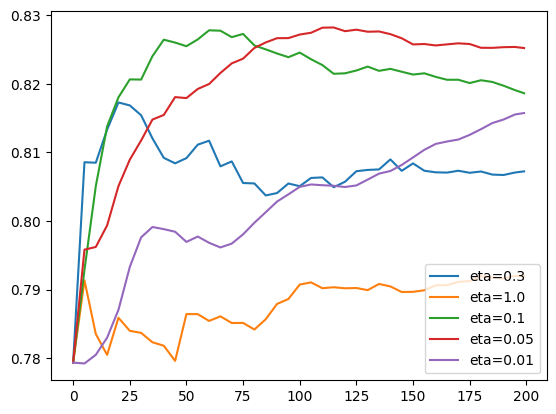

In [357]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=f'{key}')
    plt.legend()

first tune eta, then max depth nd then min child weight

In [402]:
scores = {}

In [395]:
%%capture output

xgb_params = {
    'eta': 0.1, # learning rate
    'max_depth': 6,
    'min_child_weight': 1, # same as min_samples_leaf
    'objective': 'binary:logistic', # binary classification
    'nthreads': 8, #parallelization of training

    'eval_metric': 'auc',
    'seed': 1, 
    'verbosity':1, # show only warnings
}
model = xgb.train(xgb_params, 
                  dtrain, 
                  verbose_eval=5,
                  evals=watchlist,
                  num_boost_round = 200
                  ) # prone to overfitting if num_boost_round is high

In [396]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

In [397]:
#del scores['max_depth=10']

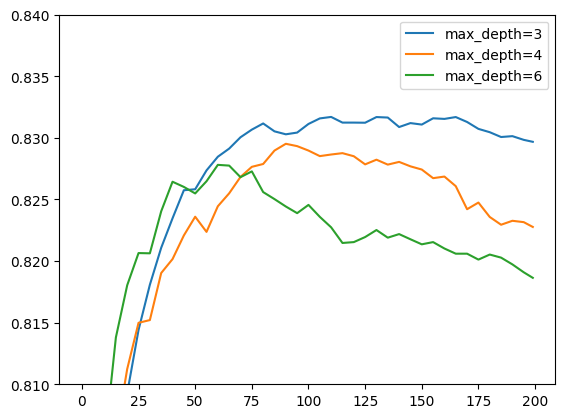

In [401]:
for max_depth, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=max_depth)
plt.ylim(0.81,0.84)
plt.legend()

In [399]:
#scores.items()

In [404]:
scores = {}

In [407]:

%%capture output

xgb_params = {
    'eta': 0.1, # learning rate
    'max_depth': 3,
    'min_child_weight': 30, # same as min_samples_leaf
    'objective': 'binary:logistic', # binary classification
    'nthreads': 8, #parallelization of training

    'eval_metric': 'auc',
    'seed': 1, 
    'verbosity':1, # show only warnings
}
model = xgb.train(xgb_params, 
                  dtrain, 
                  verbose_eval=5,
                  evals=watchlist,
                  num_boost_round = 200
                  ) # prone to overfitting if num_boost_round is high
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

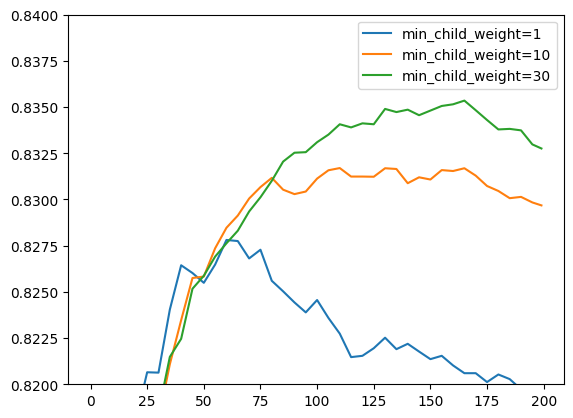

In [409]:
for min_child_weight, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=min_child_weight)
plt.ylim(0.82,0.84)
plt.legend()

In [412]:
xgb_params = {
    'eta': 0.1, # learning rate
    'max_depth': 3,
    'min_child_weight': 30, # same as min_samples_leaf
    'objective': 'binary:logistic', # binary classification
    'nthreads': 8, #parallelization of training

    'eval_metric': 'auc',
    'seed': 1, 
    'verbosity':1, # show only warnings
}
model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round = 165
                  ) # prone to overfitting if num_boost_round is high

C:\Users\hohih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:10:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "nthreads" } are not used.

  warnings.warn(smsg, UserWarning)


other paramters subsample, colsample_bytree (every decision tree can use a subset of columns, )
lambda & alpha

### selecting the final model

In [415]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)

In [416]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.7890884212055895

In [413]:
rf = RandomForestClassifier(
    n_estimators = 200,
    max_depth = 10,
    min_samples_leaf = 3,
    random_state = 1
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [417]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.8246258264512848

In [414]:
xgb_params = {
    'eta': 0.1, # learning rate
    'max_depth': 3,
    'min_child_weight': 30, # same as min_samples_leaf
    'objective': 'binary:logistic', # binary classification
    'nthreads': 8, #parallelization of training

    'eval_metric': 'auc',
    'seed': 1, 
    'verbosity':1, # show only warnings
}
model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round = 165
                  ) 

C:\Users\hohih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:16:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "nthreads" } are not used.

  warnings.warn(smsg, UserWarning)


In [422]:
y_pred = model.predict(dval)
roc_auc_score(y_val,y_pred)

0.8372435881911312

In [424]:
df_full_train = df_full_train.reset_index(drop=True)

In [426]:
y_full_train = (df_full_train.status == 'default').astype('int').values

In [427]:
y_full_train

array([0, 1, 0, ..., 0, 0, 1])

In [429]:
del df_full_train['status']

In [433]:
dicts_full_train  = df_full_train.to_dict(orient='records')
dicts_test  = df_test.to_dict(orient='records')
dv = DictVectorizer(sparse=False)


In [435]:
X_full_train = dv.fit_transform(dicts_full_train)
X_test = dv.transform(dicts_test)

In [437]:
d_full_train = xgb.DMatrix(X_full_train, 
                     label=y_full_train, 
                     feature_names=list(dv.get_feature_names_out()))
d_test = xgb.DMatrix(X_test,
                     feature_names=list(dv.get_feature_names_out()))

In [457]:
xgb_params = {
    'eta': 0.1, # learning rate
    'max_depth': 3,
    'min_child_weight': 30, # same as min_samples_leaf
    'objective': 'binary:logistic', # binary classification
    'nthreads': 8, #parallelization of training

    'eval_metric': 'auc',
    'seed': 1, 
    'verbosity':1, # show only warnings
}
model = xgb.train(xgb_params, 
                  d_full_train, 
                  num_boost_round = 165
                  ) 

C:\Users\hohih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:34:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "nthreads" } are not used.

  warnings.warn(smsg, UserWarning)


In [458]:
y_pred = model.predict(d_test)

In [459]:
roc_auc_score(y_test,y_pred)

0.8314903963638142